[*********************100%%**********************]  3 of 3 completed


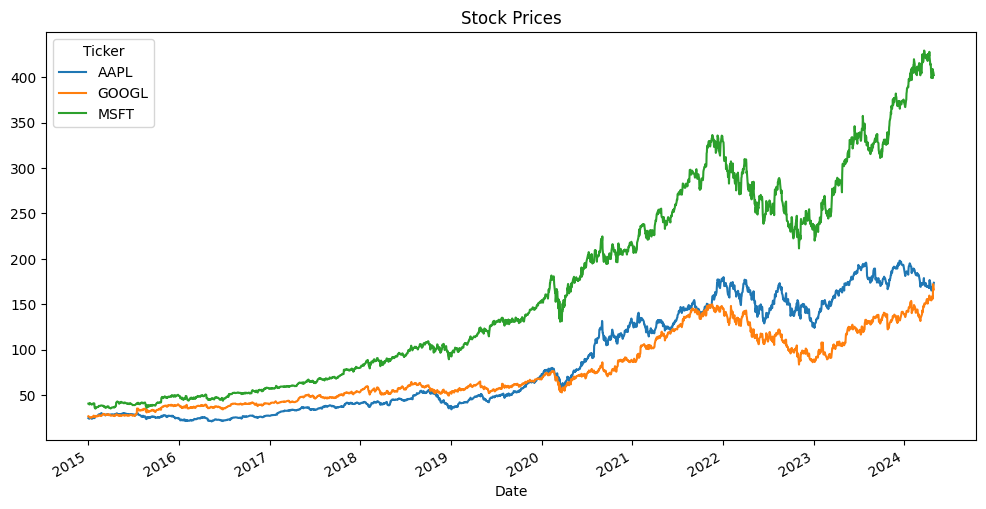

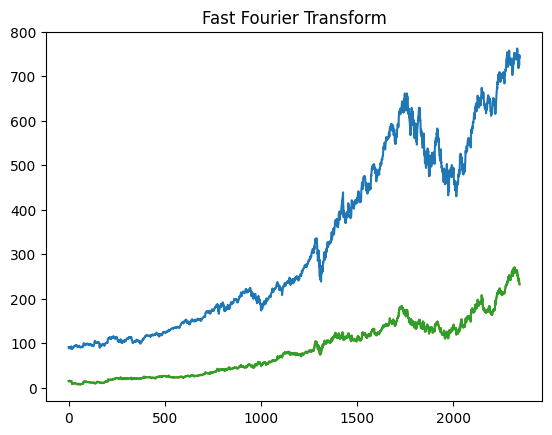

KeyError: 'SMA_20'

In [4]:
# Install required libraries
!pip install yfinance pandas-datareader matplotlib ta

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta

# Data Acquisition
tickers = ["AAPL", "GOOGL", "MSFT"]
start_date = "2015-01-01"
end_date = "2024-04-30"

# Fetch stock data
data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

# Exploratory Data Analysis
data.plot(figsize=(12, 6))
plt.title("Stock Prices")
plt.show()

# Feature Engineering
#data["SMA_20"] = data.rolling(window=20).mean()
#data["RSI"] = ta.rsi(data, length=14)

# Pattern Recognition
from scipy.fft import fft, ifft

fft_data = fft(data)
plt.plot(np.abs(fft_data))
plt.title("Fast Fourier Transform")
plt.show()

# Strategy Development
# Example: Simple Moving Average Crossover Strategy
data["Signal"] = 0
data.loc[data["SMA_20"].shift(1) < data["Adj Close"].shift(1), "Signal"] = 1
data.loc[data["SMA_20"].shift(1) > data["Adj Close"].shift(1), "Signal"] = -1
data["Strategy"] = data["Signal"].shift(1) * data["Adj Close"]

# Backtesting
data["Returns"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))
data["Strategy_Returns"] = data["Strategy"] * data["Returns"]
print(f"Strategy Performance: {data['Strategy_Returns'].sum()}")

# Deployment and Monitoring
# This step would involve integrating with a trading platform or paper trading account

# Reporting and Visualization
data["Strategy_Returns"].cumsum().plot(figsize=(12, 6))
plt.title("Strategy Cumulative Returns")
plt.show()